### Multiple plots using seaborn

In [18]:
import os
import pandas as pd
import numpy  as np
import seaborn as sns
from pathlib   import Path
import matplotlib.pyplot as plt
from IPython.display import Image

In [13]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


In [15]:
# import dataset
path_dataset = path_root / 'dataset/markets_cleaned.csv'
markets = pd.read_csv(path_dataset)
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


### Stacking to find trends
In the farmers market dataset, you are interested in the number of months that a market stays open in relation to its geography, more specifically its latitude. You're curious to see if there are any regions of the country that behave noticeably different from the others. To do this, you create a basic map with a scatter plot of the latitude and longitude of each market, coloring each market by the number of months it's open. Further digging into the latitude relationship, you draw a regression plot of the latitude to the number of months open with a flexible fit line to determine if any trends appear. You want to view these simultaneously to get the clearest picture of the trends.

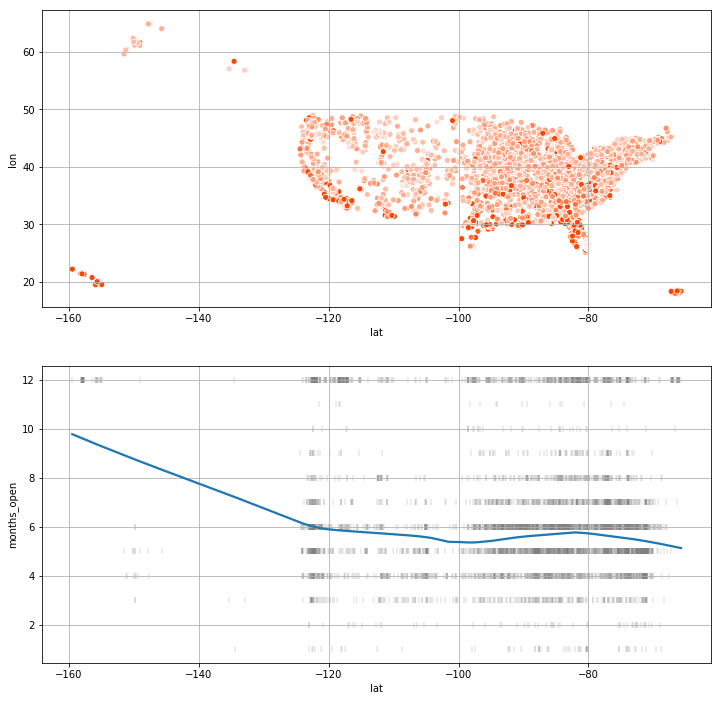

In [16]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))

# Draw location scatter plot on first plot
sns.scatterplot("lat", "lon", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lat', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)
ax1.grid()
ax2.grid()
plt.show()

### Using a plot as a legend
One interesting thread of investigation in the farmer's market data is a state's "market friendliness" and specifically, the outliers. One way to look at this is by using the ratio of farmer's markets to people by state. You could directly look at the ratio; however, a ratio throws away the raw information about a state's population and the number of markets. A large state with a high ratio could be more interesting than a small one. You can show both the ratio and raw numbers by drawing two plots, one of the ratio and the other of the market number to population scatter plot. To help simplify your now dense visualization, you can use the bar plot as a legend; calling out interesting states by matching the colors of their bars and scatter points.

In [ ]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

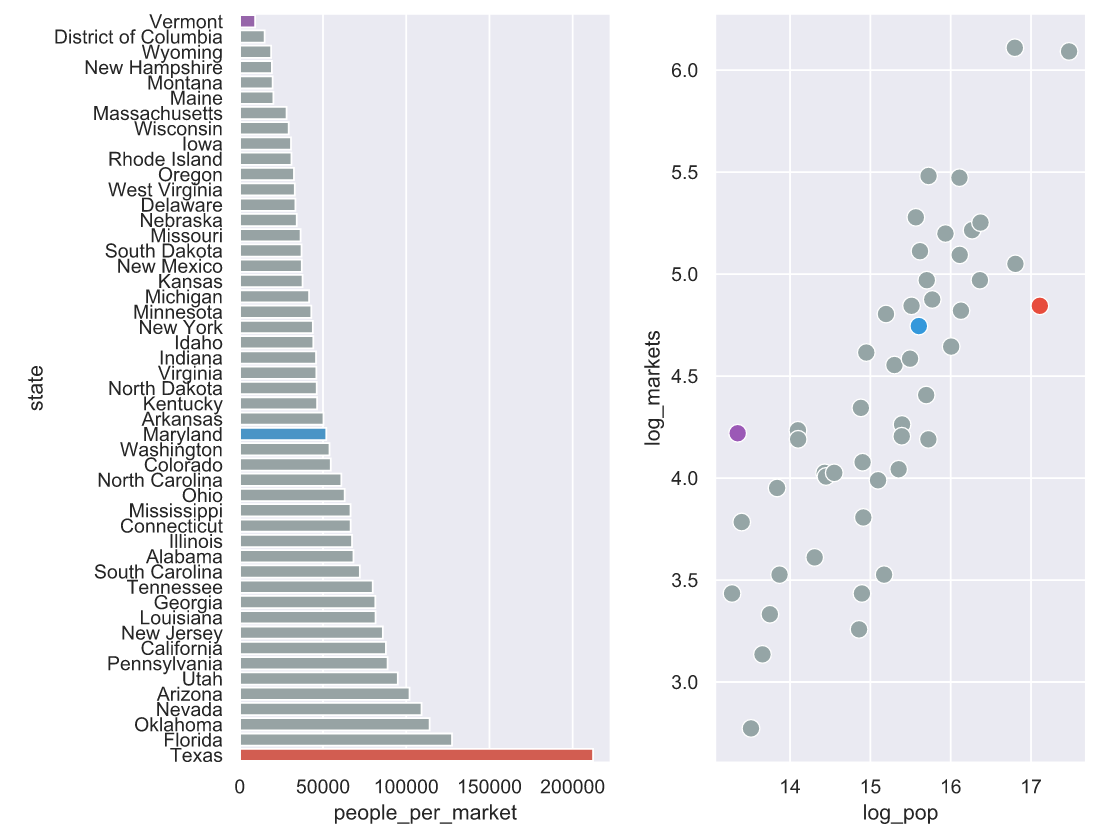

In [20]:
# plot generate by the code above
Image(filename = 'plot/bar_plots.png', width = 800, height = 350)